<H1><CENTER> Machine Learning Lab - Exercise Sheet 1 <br /></CENTER></H1>
<H2><CENTER> Author: Sebastian Pineda Arango  <br />
ID: 246098<br />
Universität Hildesheim - Data Analytics Master </CENTER></H2>

<img src="https://www.uni-hildesheim.de/typo3conf/ext/unihildesheim/Resources/Public/Images/logo-uni.svgz" width="100">


### Word Count Program



The objective in this part is to count the words in a text. To do that we have divided the task in different tasks, which are explained as follows:

1. Open the text file
2. Read the lines
3. Merge lines in a text
4. Preprocess text using regular expressions
5. Split text in words
6. Filter words: stop words and length. We use words with length greater than 1, otherwise they are considered meaningless.
7. Select unique words (done using "set" data type of type)
8. Count words
9. Order words by count
10. Select top 10 words
11. Plot top 10 words

As follows, we show the code to perform these operations.

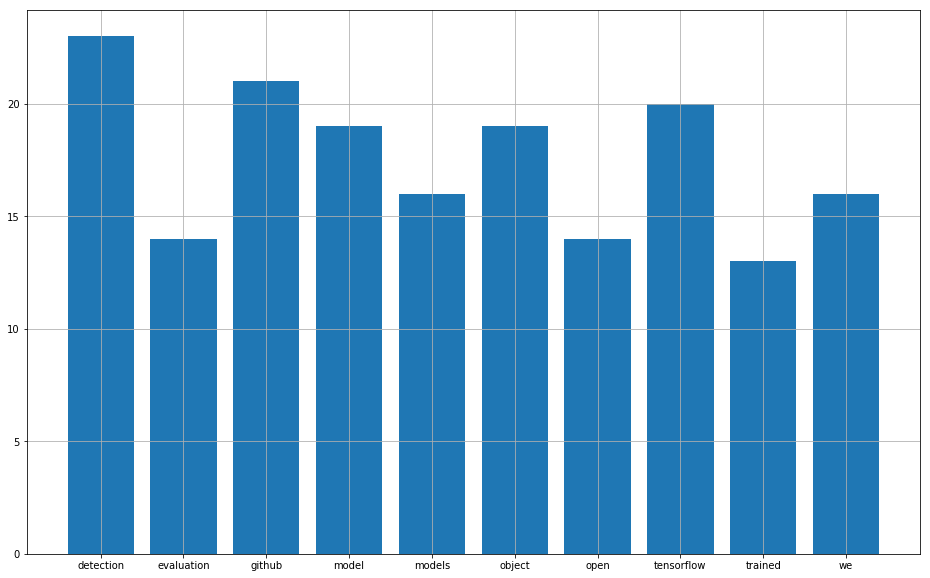

In [84]:
#Note: some help for working with regular expressions were takne from:
#https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
#https://stackoverflow.com/questions/252626/need-a-simple-regex-to-find-a-number-in-a-single-word
#https://www.regextester.com/97589
#https://stackoverflow.com/questions/34117950/filter-strings-by-regex-in-a-list
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

#1. Opening the text file
f =  open("README.txt", "r")

#2. Reading the lines
lines = f.readlines()

###Without text preprocessing
text = ""

#3. Merge lines in a text: Stacking lines into a single text
for l in lines:
    text = text + " " +l

#4. Preprocess text using regular expressions
text = text.lower() ###All lower case
text2 = re.sub(r'\<.*?\>','',text) #filtering everything between <>
text3 = re.sub(r'[^\w\s]',' ',text2) #filtering punctuation
text4 = re.sub(r'[0-9]',' ',text3) #filtering numbers
text5 = re.sub(r'\n',' ', text4) #filtering end line character
text6 = re.sub(r'\_', ' ', text5) #filter underline

#5. Splitting text into words. The words are considered as the group 
#of characters separated by space (" ")
words = text6.split(" ")

#list of stop words
stop_words = ["the", "an", "and", "be", "to", "https", "for", "of",
              "on", "com", "with", "this", "in"]

#6. Filtering only words which length greater than one
words1 = filter(lambda x: len(x)>1 , words)

#6. Filtering only words that are non-stop words
words2 = filter(lambda x: x not in stop_words, words1)

#7. Getting unique words
unique_words = set(words2)

#creating dictionary to count
dict_count= {}

#8. counting words
for w in unique_words:
    dict_count[w]=words.count(w)

#getting the list of keys
keys = list(dict_count.keys())

#getting the list of values
values = list(dict_count.values())

#creating dataframe with keys and values as columns
df_count = pd.DataFrame({
    'word': keys,
    'count': values
})

#9-10. ordering data and selecting top data
df_top = df_count.sort_values(by=['count'], ascending=False).iloc[0:10]


#1plotting results of top appearing words
%matplotlib inline

fig, ax = plt.subplots(figsize=(16, 10))

#barplot for histogram
ax.bar(list(df_top['word']),list(df_top['count']))
ax.grid()

Now we present the top as a count in the following way.

In [64]:
df_top

,count,word
403,23,detection
339,21,github
200,20,tensorflow
240,19,object
218,19,model
471,16,we
71,16,models
85,14,open
412,14,evaluation
188,13,trained


### Matrix Multiplication



Given a matrix and a vector:

$v =  
\begin{bmatrix}
    v_{1}   \\
    v_{2}    \\
    \dots \\
    v_{20}    
\end{bmatrix}
$
$
A =  
\begin{bmatrix}
    x_{1,1} & \dots & x_{1,20}  \\
    x_{2,1} & \dots & x_{2, 20}   \\
    \dots & \dots & \dots \\
    x_{100,1} & \dots &  x_{100, 20}  
\end{bmatrix}
$

Then the multiplication $c = Av$ is the multiplication and is given by:

$c_{i} = \sum_{j=1}^{20} A_{ij}v_j $ 

For $i= 1, ..., 100$

We apply this using two for loops.


Proof of the operation. This number should be zero: -0.0000
The mean is : 20.0479
The standard deviation is 2.4818
The mean of A is: 0.5015
The mean of v is: 1.9988


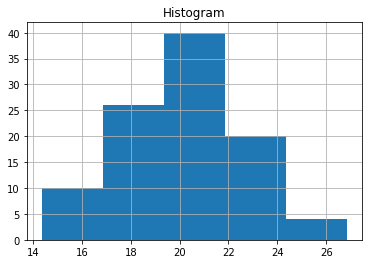

In [65]:
#function reference in https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
A = np.matrix(np.random.random( (100,20))) #creating random matrix of size 100x2
v = np.matrix(np.random.normal(2, 0.01, (20,1))) #creating random vector of size 20x1

c=np.zeros((100,1)) #initializing matrix with the multiplication
for i in range(A.shape[0]): #iterating over rows
    for j in range( A.shape[1]):#iterating over columns
        c[i] = c[i] + A[i,j]*v[j] #performing cumulative multiplication

c_ = A*v #performing multiplication to serve as comparison
print("Proof of the operation. This number should be zero: %.4f"%sum(c-c_))

#calculating mean
mean = np.mean(c)

#calculating standard deviation
sd = np.std(c)

#plotting histogram
plt.hist(c, bins=5)
plt.grid()
plt.title("Histogram")

#printing mean and standarg deviation
print("The mean is : %.4f"% mean)
print("The standard deviation is %.4f"% sd)
print("The mean of A is: %.4f"% np.mean(A))
print("The mean of v is: %.4f"% np.mean(v))

As we can see, the mean of A and the mean of v are related with the final mean obtained for the vector c.

In fact we can note that:

$\bar{c}=\bar{v}*\bar{A}*20$

Where $\bar{A}$ and $\bar{v}$ are the means of A and v respectively. And the 20 comes from the summatory over the 20 different multiplications.

## Linear Regression through exact form


We initialize three datasets normaly distributed using the function $np.random.normal$. The matrices must have size 100x2. It means, one hundred rows and two columns.

In [66]:
#Creating data sets
A1 = np.matrix(np.random.normal(2, 0.01, (100,2)))
A2 = np.matrix(np.random.normal(2, 0.1, (100,2)))
A3 = np.matrix(np.random.normal(2, 1.0, (100,2)))

Now, if we assume, that the first column is our feature (X) and the second column is y, then we can get a matrix in the following form, which represents a linear equation.

Our objective is to learn a linear regressin function which has the following form:

$\hat{Y} = \beta_1x + \beta_0$

Since we have different values for y and x (100 samples on the dataset), we could express the last equation as a matrix equation. Therefore, assuming that:
$Y =  
\begin{bmatrix}
    y_{1}   \\
    y_{2}    \\
    \dots \\
    y_{n}    
\end{bmatrix}
$
$
X =  
\begin{bmatrix}
    x_{1} & 1  \\
    x_{2} & 1   \\
    \dots \\
    x_{n} & 1   
\end{bmatrix}
$
$
\beta =  
\begin{bmatrix}
    \beta_{0}   \\
    \beta_{1}     
\end{bmatrix}
$

We then can express the regression equation as:

$Y= X\beta$

However, we don't know the value of $\beta$. That's why, we apply the norm equations to find it.

From the norm equations we have:

$X^TX\hat{\beta} = X^TY$

We can operate as follows to leave $\beta$ alone:
$
\\
(X^TA)\beta = X^TY
\\
(X^TX)^{-1}(X^TX)\beta = (X^TX)^{-1}X^TY
\\
Since \ (X^TX)^{-1}(X^TX)=I
\\
I\beta = (X^TX)^{-1}X^TY
\\
\beta = (X^TX)^{-1}X^TY$


We apply the last equation to get the value of beta on the function $learn\_linreg\_normeq$. For that we create a new column corresponding to the columns of ones. This will be a dummy vairblae that permits to learn the intercept. 



In [67]:
##LEARN-LINREG-NORMEQ
def learn_linreg_normeq(A):
    
    '''This function takes a two columns matrix A and usse the first column as predictor and the second one as target 
    to fit a basi linear regression model. The output es then the parameter vector (beta) which better fits the regression.'''
    
    #Separating columns
    x = A[:,0]
    y = A[:,1]
    
    #Adding column of ones
    x = np.hstack((x, np.ones(np.shape(x))))
    
    #Converting to matrix data type, so that it is easy to operate
    x = np.matrix(x)
    y = np.matrix(y)
    
    #applying the mathematical solution
    beta = (np.linalg.inv(x.T*x))*x.T*y
    
    return beta

Now we use the before created data sets to find the beta values. For that, we also use the above created function $learn\_linreg\_normeq$. Later we print the values of beta.

In [68]:
beta_A1 = learn_linreg_normeq(A1)
beta_A2 = learn_linreg_normeq(A2)
beta_A3 = learn_linreg_normeq(A3)

In [69]:
print("Beta A1:",beta_A1.round(4))
print("Beta A2:",beta_A2.round(4))
print("Beta A3:",beta_A3.round(4))

Beta A1: [[ 0.0146]
 [ 1.9721]]
Beta A2: [[-0.1486]
 [ 2.2818]]
Beta A3: [[-0.025]
 [ 2.223]]


We see that the first component of beta (which corresponds to beta 1).

Now we want to predict values using the fitted beta. Doin]g that implies to use the following equation:

$y = x\beta $

We create in the the following code a function that implements this idea.

In [70]:
#PREDICT-SIMPLE-LINREG
def predict_simple_linreg(beta,x):
    
    '''This function recieves to parameters: beta and x, to calculate the predictions of a basic linear regression model.'''
    
    #Organizing data to be of size = NX1
    x = np.reshape(x, (-1,1))
    
    #Adding new column
    x = np.hstack((x, np.ones(np.shape(x))))
    
    #Casting data
    x = np.matrix(x)
    beta = np.matrix(beta)
    
    #Applying matrix multiplication
    y_pred = x*beta
    
    return y_pred
    

Now we use the created function to create predictions over the three created matrices. The created function receives \beta and x as argument.

In [71]:
#Making predictions for all A values. This implies to take x from A

x_A1 = A1[:,0] #Taking predictor from matrix A1
y_pred_A1 = predict_simple_linreg(beta_A1, x_A1)

x_A2 = A2[:,0] #Taking predictor from matrix A2
y_pred_A2 = predict_simple_linreg(beta_A2, x_A2)

x_A3 = A3[:,0] #Taking predictor form matrix A3
y_pred_A3 = predict_simple_linreg(beta_A3, x_A3)

We want to plot the predicted line and the real data to compare. For that, we create a vector of conitnuous numbers so that we can visualize a line. We also plot the predicted values and the real values for all three matrices.

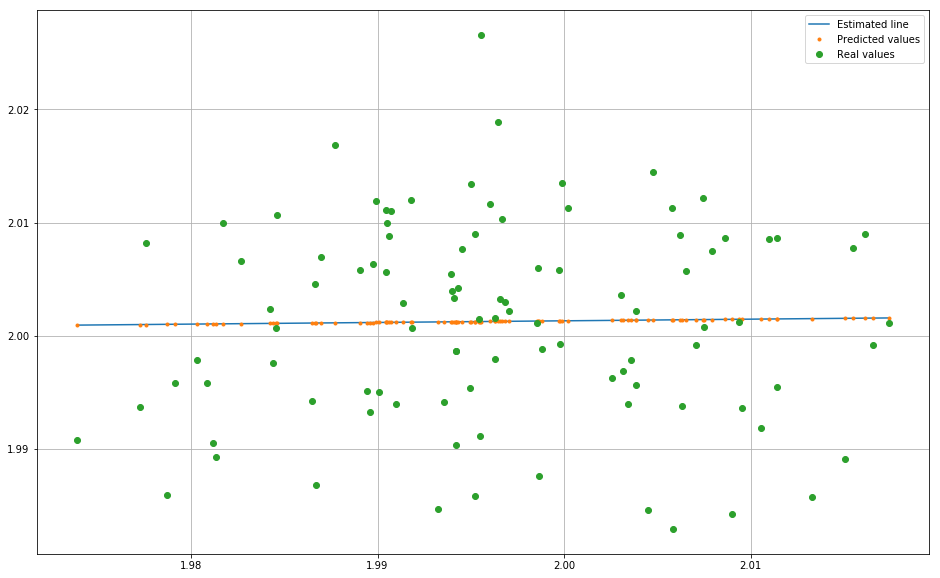

In [72]:
#Creating a vector of continuous values to plot the predicted line
x_est_A1 = np.arange(min(x_A1[:,0]), max(x_A1[:,0]), (max(x_A1[:,0])-min(x_A1[:,0]))/1000)

#Making predictions over the vector 
y_est_A1 = predict_simple_linreg(beta_A1, x_est_A1)

#Creating objects to plot for results of matrix A1
fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(x_est_A1, y_est_A1) # plotting estimated line
ax.plot(x_A1, y_pred_A1,'.')# plotting estimated values (predicted values)
ax.plot(x_A1, A1[:,1], 'o')# plotting real values
ax.grid()

ax.legend(("Estimated line", "Predicted values", "Real values"))

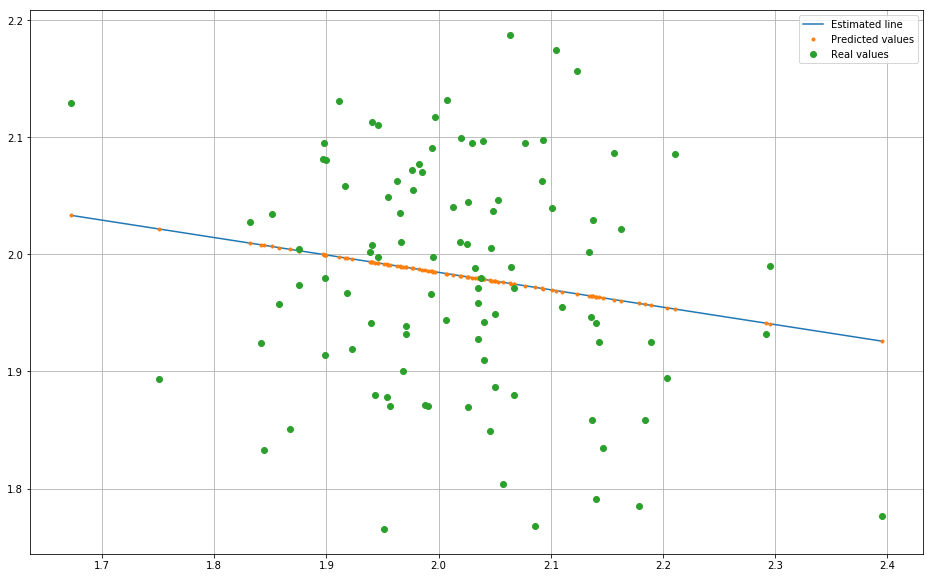

In [73]:
#Creating a vector of continuous values to plot the predicted line
x_est_A2 = np.arange(min(x_A2[:,0]), max(x_A2[:,0]), (max(x_A2[:,0])-min(x_A2[:,0]))/1000)
y_est_A2= predict_simple_linreg(beta_A2, x_est_A2)

#Creating objects to plot for results of matrix A2
fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(x_est_A2, y_est_A2)# plotting estimated line
ax.plot(x_A2, y_pred_A2,'.')# plotting estimated values (predicted values)
ax.plot(x_A2, A2[:,1], 'o')# plotting real values
ax.grid()

ax.legend(("Estimated line", "Predicted values", "Real values"))

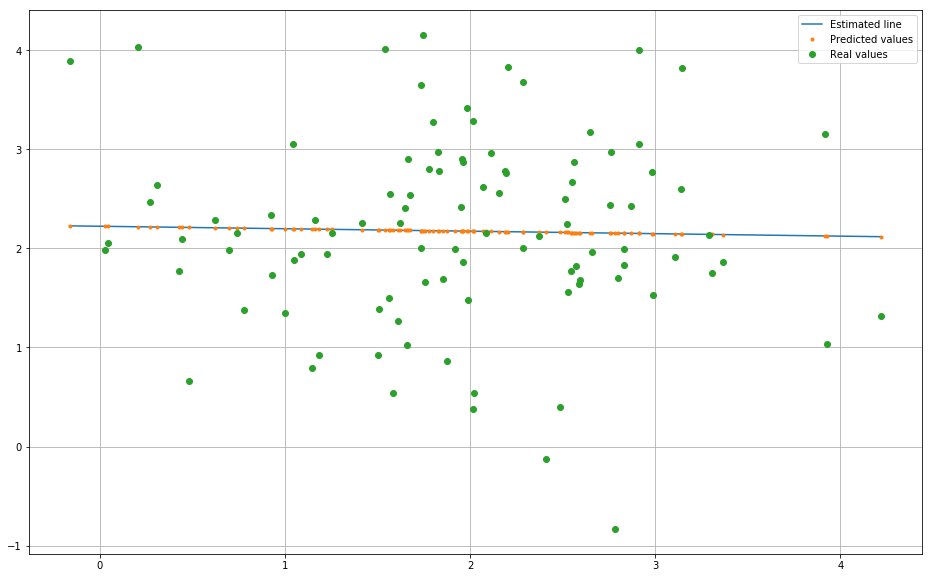

In [74]:
#Creating a vector of continuous values to plot the predicted line
x_est_A3 = np.arange(min(x_A3[:,0]), max(x_A3[:,0]), (max(x_A3[:,0])-min(x_A3[:,0]))/1000)
y_est_A3= predict_simple_linreg(beta_A3, x_est_A3)

#Creating objects to plot for results of matrix A2
fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(x_est_A3, y_est_A3)# plotting estimated line
ax.plot(x_A3, y_pred_A3,'.')# plotting estimated values (predicted values)
ax.plot(x_A3, A3[:,1], 'o')# plotting real values
ax.grid()

ax.legend(("Estimated line", "Predicted values", "Real values"))

##### We note that as we vary $\sigma$, the data get more disperse and therefore the fitted line is worse predicting.

Now we are going to experiment what happen when we set the values of beta to zero. First we set $\beta_0$ to zero and then plot the results.

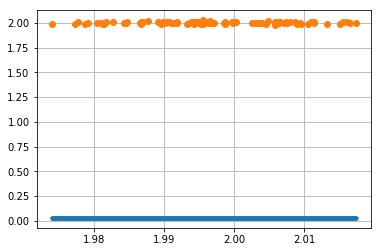

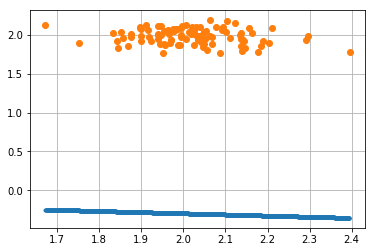

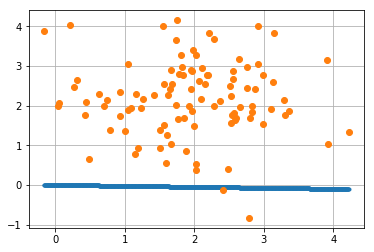

In [75]:
#Setting beta0 to 0
beta_A1[1]= 0
beta_A2[1]= 0
beta_A3[1]= 0

#Creating data to plot the estimated line for A1 dataset
x_est_A1 = np.arange(min(x_A1[:,0]), max(x_A1[:,0]), (max(x_A1[:,0])-min(x_A1[:,0]))/1000)
y_est_A1 = predict_simple_linreg(beta_A1, x_est_A1)

fig, ax = plt.subplots()

#Plotting the line of A1 data set
ax.plot(x_est_A1, y_est_A1,'.')
ax.plot(x_A1, A1[:,1], 'o')
ax.grid()

#Creating data to plot the estimated line for A2 dataset
x_est_A2 = np.arange(min(x_A2[:,0]), max(x_A2[:,0]), (max(x_A2[:,0])-min(x_A2[:,0]))/1000)
y_est_A2= predict_simple_linreg(beta_A2, x_est_A2)

fig, ax = plt.subplots()

#Plottting the line of A2 data set
ax.plot(x_est_A2, y_est_A2,'.')
ax.plot(x_A2, A2[:,1], 'o')
ax.grid()

#Creating data to plot the estimated line for A3 dataset
x_est_A3 = np.arange(min(x_A3[:,0]), max(x_A3[:,0]), (max(x_A3[:,0])-min(x_A3[:,0]))/1000)
y_est_A3= predict_simple_linreg(beta_A3, x_est_A3)

fig, ax = plt.subplots()

#Plotting the line of A3 data set
ax.plot(x_est_A3, y_est_A3,'.')
ax.plot(x_A3, A3[:,1], 'o')
ax.grid()

After setting $\beta_0$ to zero we notice that the fitted line falls near to x-axis. That happens because this $\beta_0$ corresponds to the intercept with y_axis. If you set it to zero, we force our fitted line to go through y=0.

Now our plan is to see what happens when we set $\beta_1$ to zero.

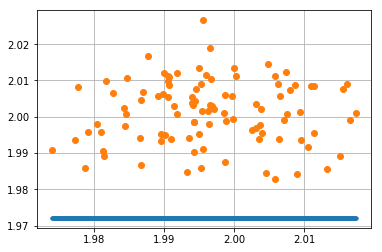

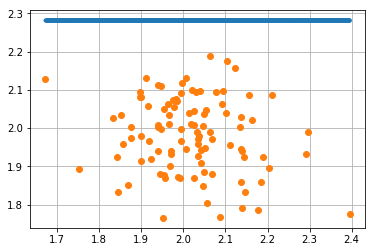

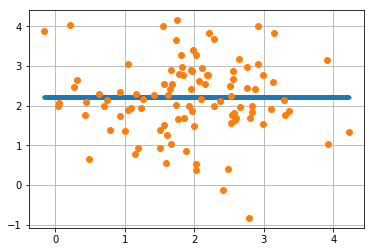

In [76]:
#Recalculating beta values
beta_A1 = learn_linreg_normeq(A1)
beta_A2 = learn_linreg_normeq(A2)
beta_A3 = learn_linreg_normeq(A3)

#Setting beta1 to 0
beta_A1[0]= 0
beta_A2[0]= 0
beta_A3[0]= 0

#Creating data to plot the estimated line for A1 dataset
x_est_A1 = np.arange(min(x_A1[:,0]), max(x_A1[:,0]), (max(x_A1[:,0])-min(x_A1[:,0]))/1000)
y_est_A1 = predict_simple_linreg(beta_A1, x_est_A1)

fig, ax = plt.subplots()

#Plotting the line of A1 data set
ax.plot(x_est_A1, y_est_A1,'.')
ax.plot(x_A1, A1[:,1], 'o')
ax.grid()

#Creating data to plot the estimated line for A2 dataset
x_est_A2 = np.arange(min(x_A2[:,0]), max(x_A2[:,0]), (max(x_A2[:,0])-min(x_A2[:,0]))/1000)
y_est_A2= predict_simple_linreg(beta_A2, x_est_A2)

fig, ax = plt.subplots()

#Plottting the line of A2 data set
ax.plot(x_est_A2, y_est_A2,'.')
ax.plot(x_A2, A2[:,1], 'o')
ax.grid()

#Creating data to plot the estimated line for A3 dataset
x_est_A3 = np.arange(min(x_A3[:,0]), max(x_A3[:,0]), (max(x_A3[:,0])-min(x_A3[:,0]))/1000)
y_est_A3= predict_simple_linreg(beta_A3, x_est_A3)

fig, ax = plt.subplots()

#Plotting the line of A3 data set
ax.plot(x_est_A3, y_est_A3,'.')
ax.plot(x_A3, A3[:,1], 'o')
ax.grid()

After setting $\beta_1$ = 0, we see that the fitted line is constant and doesn't vary as x varies. This happens because $\beta_1$ is the term which affects the x values (the coefficient of x), while $\beta_0$ is a constant value.

Then, our ask is to find the beta values for $\beta_0$ and $\beta_1$ using the numpy function _numpy.linalg.lstsq_. We involve this function insisde another wrapper function called _learn\_using\_library_ so that this last function prepares the data. On the other hand, the function _numpy.linalg.lstsq_ receives x and y as arguments.

In [77]:
def learn_using_library(A):
    
    '''This function takes a two columns matrix A and usse the first column as predictor and the second one as target 
    to fit a basic linear regression model using a numpy function.
    The output es then the parameter vector (beta) which better fits the regression.'''
    
    #Taking out the x and y vector
    x = A[:,0]
    y = A[:,1]
    
    #Creating the x matrix
    x = np.hstack((x, np.ones(np.shape(x))))
    
    #Casting the matrix
    x = np.matrix(x)
    y = np.matrix(y)
    
    #Using the numpy function to find the beta value
    beta = np.linalg.lstsq(x,y)
    
    return beta

beta_A1_numpy = learn_using_library(A1)
beta_A2_numpy = learn_using_library(A2)
beta_A3_numpy = learn_using_library(A3)

print("Beta A1 with numpy:", beta_A1_numpy[0].round(4))
print("Beta A2 with numpy:", beta_A2_numpy[0].round(4))
print("Beta A3 with numpy:", beta_A3_numpy[0].round(4))

Beta A1 with numpy: [[ 0.0146]
 [ 1.9721]]
Beta A2 with numpy: [[-0.1486]
 [ 2.2818]]
Beta A3 with numpy: [[-0.025]
 [ 2.223]]


In [78]:
beta_A1 = learn_linreg_normeq(A1)
beta_A2 = learn_linreg_normeq(A2)
beta_A3 = learn_linreg_normeq(A3)

print("Beta A1 with normal equations:", beta_A1_numpy[0].round(4))
print("Beta A2 with normal equations:", beta_A2_numpy[0].round(4))
print("Beta A3 with normal equations:", beta_A3_numpy[0].round(4))

Beta A1 with normal equations: [[ 0.0146]
 [ 1.9721]]
Beta A2 with normal equations: [[-0.1486]
 [ 2.2818]]
Beta A3 with normal equations: [[-0.025]
 [ 2.223]]


We can see finallally that the results are the same, if we compare the results of our implemented function with the results of the numpy function.